<a href="https://colab.research.google.com/github/Ramykaz/Solar-Panel-Anomaly-Detection/blob/main/defcetive_non_defective.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="TYCxQVZrrdnE0E1tmaSw")
project = rf.workspace("sa-tvpln").project("def-nondef-ra-aob9o")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Def/Nondef-Ra-1 in yolov8:: 100%|██████████| 2808/2808 [00:00<00:00, 7086.41it/s]


In [ ]:
!pip install ultralytics
from ultralytics import YOLO

#  dataset YAML file
dataset_yaml = dataset.location + "/content/Def/Nondef-Ra-1/data.yaml"


In [ ]:
from ultralytics import YOLO

# Load model
model = YOLO("yolov8m.pt")

# Train
results = model.train(
    data="/content/Def/Nondef-Ra-1/data.yaml",  # make sure this path is correct
    epochs=200,
    imgsz=640,
    batch=16,
    device=0,
    optimizer="auto",  # let YOLO choose the best optimizer
    lr0=0.01,  # initial learning rate
    amp=True,  # automatic mixed precision
    val=True,  # validate during training
    patience=30,  # epochs to wait for improvement
    workers=4,
    pretrained=True,
    augment=True,  # enable augmentation
    box=7.5,  # box loss gain
    cls=0.5,  # cls loss gain
    dfl=1.5,  # dfl loss gain
    overlap_mask=False,
    hsv_h=0.015,  # image HSV-Hue augmentation
    hsv_s=0.7,  # image HSV-Saturation augmentation
    hsv_v=0.4,  # image HSV-Value augmentation
    fliplr=0.5,  # flip left-right probability
    mosaic=1.0,  # mosaic augmentation probability
    mixup=0.1,  # mixup augmentation probability
    copy_paste=0.1  # copy-paste augmentation probability
)

Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Def/Nondef-Ra-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train6, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=False, patience=30, perspective=0.0, plots=True, pose

train: Scanning /content/Def/Nondef-Ra-1/train/labels.cache... 1278 images, 145 backgrounds, 0 corrupt: 100%|██████████| 1278/1278 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4, len(boxes) = 3613. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 587.3±131.0 MB/s, size: 78.9 KB)


val: Scanning /content/Def/Nondef-Ra-1/valid/labels.cache... 122 images, 15 backgrounds, 0 corrupt: 100%|██████████| 122/122 [00:00<?, ?it/s]


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train6
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      6.49G      2.662      2.887      1.515         83        640: 100%|██████████| 80/80 [00:11<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.99it/s]


                   all        122        362    0.00457      0.318    0.00275    0.00112

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200       7.3G      2.509      2.074      1.481         42        640: 100%|██████████| 80/80 [00:10<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.06it/s]

                   all        122        362      0.498      0.381      0.321     0.0899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200       7.3G      2.598      2.146      1.486         49        640: 100%|██████████| 80/80 [00:09<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.87it/s]

                   all        122        362      0.441      0.345      0.271     0.0696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200       7.3G      2.488       2.03       1.48         35        640: 100%|██████████| 80/80 [00:09<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.94it/s]

                   all        122        362      0.424      0.298      0.198     0.0606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200       7.3G      2.456      1.985      1.482         52        640: 100%|██████████| 80/80 [00:09<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.09it/s]

                   all        122        362      0.524       0.55      0.482      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200       7.3G      2.432       1.91      1.449         51        640: 100%|██████████| 80/80 [00:09<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.01it/s]

                   all        122        362      0.552      0.586      0.499      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200       7.3G      2.391      1.811      1.412         37        640: 100%|██████████| 80/80 [00:09<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.17it/s]

                   all        122        362       0.54      0.569      0.503      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200       7.3G       2.38      1.803      1.416         56        640: 100%|██████████| 80/80 [00:10<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.16it/s]

                   all        122        362       0.51      0.534      0.428       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200       7.3G      2.365      1.805      1.396         44        640: 100%|██████████| 80/80 [00:09<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.03it/s]

                   all        122        362      0.509      0.597      0.479      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200       7.3G      2.318      1.792      1.426         40        640: 100%|██████████| 80/80 [00:09<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.01it/s]

                   all        122        362      0.606       0.61      0.584      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200       7.3G      2.353      1.768       1.42         44        640: 100%|██████████| 80/80 [00:09<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.09it/s]

                   all        122        362      0.613       0.58      0.561      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200       7.3G      2.334      1.725      1.418         26        640: 100%|██████████| 80/80 [00:09<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.87it/s]

                   all        122        362      0.543      0.574      0.527      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200       7.3G       2.27       1.72      1.371         53        640: 100%|██████████| 80/80 [00:09<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.98it/s]

                   all        122        362      0.568       0.58      0.543      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200       7.3G      2.265      1.622      1.361         55        640: 100%|██████████| 80/80 [00:09<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.24it/s]

                   all        122        362      0.614      0.519      0.513      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200       7.3G      2.282      1.705      1.348         48        640: 100%|██████████| 80/80 [00:09<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.00it/s]

                   all        122        362       0.58      0.608      0.564      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200       7.3G      2.269      1.666      1.358         33        640: 100%|██████████| 80/80 [00:09<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.98it/s]

                   all        122        362      0.494       0.61      0.489      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200       7.3G       2.26      1.657      1.354         39        640: 100%|██████████| 80/80 [00:09<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.07it/s]

                   all        122        362      0.524      0.624      0.525      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200       7.3G       2.26      1.646      1.369         43        640: 100%|██████████| 80/80 [00:09<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.11it/s]

                   all        122        362      0.563      0.645      0.546       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200       7.3G       2.27      1.642      1.342         57        640: 100%|██████████| 80/80 [00:09<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.16it/s]

                   all        122        362        0.6       0.61      0.585      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200       7.3G      2.234      1.583      1.325         74        640: 100%|██████████| 80/80 [00:09<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.06it/s]

                   all        122        362       0.62      0.572      0.574      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200       7.3G      2.248      1.633      1.348         58        640: 100%|██████████| 80/80 [00:09<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.07it/s]

                   all        122        362      0.631      0.666      0.612      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200       7.3G      2.237       1.63      1.373         28        640: 100%|██████████| 80/80 [00:09<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.03it/s]

                   all        122        362      0.636      0.588      0.571      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200       7.3G      2.208        1.6      1.342         52        640: 100%|██████████| 80/80 [00:09<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.19it/s]

                   all        122        362      0.658      0.638      0.636      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      7.34G      2.226      1.599      1.334         38        640: 100%|██████████| 80/80 [00:09<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.05it/s]

                   all        122        362      0.599      0.634      0.605      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      7.41G      2.194      1.575      1.347         56        640: 100%|██████████| 80/80 [00:09<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.06it/s]

                   all        122        362      0.614      0.646      0.613      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      7.47G      2.216      1.557       1.33         66        640: 100%|██████████| 80/80 [00:09<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.87it/s]

                   all        122        362       0.59      0.633      0.565      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      7.48G      2.212      1.535      1.339         47        640: 100%|██████████| 80/80 [00:09<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.87it/s]

                   all        122        362       0.59      0.628      0.581      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      7.48G      2.189      1.539      1.325         84        640: 100%|██████████| 80/80 [00:09<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.03it/s]

                   all        122        362      0.543      0.619      0.571        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      7.48G      2.178      1.549      1.304         52        640: 100%|██████████| 80/80 [00:09<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.04it/s]

                   all        122        362      0.624      0.655      0.638      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      7.48G      2.215       1.55      1.328         69        640: 100%|██████████| 80/80 [00:09<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.11it/s]

                   all        122        362      0.588      0.627      0.584      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      7.48G      2.179      1.525      1.306         56        640: 100%|██████████| 80/80 [00:09<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.19it/s]

                   all        122        362       0.61      0.635      0.591        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      7.48G      2.179       1.55      1.328         74        640: 100%|██████████| 80/80 [00:09<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.16it/s]

                   all        122        362      0.609      0.674      0.626      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      7.48G      2.163      1.533      1.323         38        640: 100%|██████████| 80/80 [00:09<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.10it/s]

                   all        122        362      0.671       0.68      0.664      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      7.48G      2.152      1.467      1.314         47        640: 100%|██████████| 80/80 [00:09<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.06it/s]

                   all        122        362      0.663      0.677      0.666      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      7.48G      2.153       1.52      1.316         59        640: 100%|██████████| 80/80 [00:09<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.82it/s]

                   all        122        362      0.646      0.675       0.65      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      7.48G      2.134      1.482      1.297         50        640: 100%|██████████| 80/80 [00:09<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.13it/s]

                   all        122        362      0.631      0.674      0.656      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      7.48G      2.141      1.474      1.313         56        640: 100%|██████████| 80/80 [00:09<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.01it/s]

                   all        122        362      0.604       0.63      0.611      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      7.48G      2.154      1.464      1.311         42        640: 100%|██████████| 80/80 [00:09<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.99it/s]

                   all        122        362      0.658      0.655      0.663      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      7.48G      2.168      1.503      1.314         44        640: 100%|██████████| 80/80 [00:09<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.92it/s]

                   all        122        362      0.652       0.68      0.665      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      7.48G      2.119      1.443      1.303         87        640: 100%|██████████| 80/80 [00:09<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.11it/s]

                   all        122        362      0.674      0.702      0.655      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      7.48G       2.15      1.515      1.308         57        640: 100%|██████████| 80/80 [00:09<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.95it/s]

                   all        122        362      0.634      0.652      0.624      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      7.48G      2.129      1.462      1.303         42        640: 100%|██████████| 80/80 [00:09<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.99it/s]

                   all        122        362      0.617      0.605      0.594       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      7.54G      2.128      1.471      1.316         48        640: 100%|██████████| 80/80 [00:09<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.99it/s]

                   all        122        362      0.629      0.655      0.629      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      7.58G      2.127      1.448      1.314         56        640: 100%|██████████| 80/80 [00:09<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.14it/s]

                   all        122        362      0.682      0.677      0.671      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      7.58G      2.144      1.479      1.291        114        640: 100%|██████████| 80/80 [00:09<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.15it/s]

                   all        122        362      0.646      0.644      0.644      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      7.58G      2.133      1.445       1.32         57        640: 100%|██████████| 80/80 [00:09<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.14it/s]

                   all        122        362      0.631      0.684      0.644      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      7.58G      2.074      1.386      1.284         59        640: 100%|██████████| 80/80 [00:09<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.10it/s]

                   all        122        362      0.653      0.718      0.655       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      7.58G      2.143      1.445      1.309         51        640: 100%|██████████| 80/80 [00:09<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.11it/s]

                   all        122        362      0.688      0.685       0.66      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      7.58G      2.134      1.448      1.302         64        640: 100%|██████████| 80/80 [00:09<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.10it/s]

                   all        122        362      0.695      0.713      0.681      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      7.58G      2.097      1.382      1.256         26        640: 100%|██████████| 80/80 [00:09<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.02it/s]

                   all        122        362      0.628      0.667      0.643      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      7.58G      2.102      1.412      1.276         46        640: 100%|██████████| 80/80 [00:09<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.21it/s]

                   all        122        362      0.677       0.66      0.655      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      7.58G      2.114      1.437      1.282        100        640: 100%|██████████| 80/80 [00:10<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.11it/s]

                   all        122        362      0.706      0.677       0.67      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      7.58G      2.087      1.388      1.275        102        640: 100%|██████████| 80/80 [00:09<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.96it/s]

                   all        122        362       0.67      0.724      0.658      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      7.58G      2.068       1.39      1.292         91        640: 100%|██████████| 80/80 [00:09<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.13it/s]

                   all        122        362       0.65      0.674      0.652      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      7.58G      2.123      1.397      1.279         94        640: 100%|██████████| 80/80 [00:09<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.16it/s]

                   all        122        362      0.681      0.702      0.669      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      7.58G      2.097      1.364      1.287         60        640: 100%|██████████| 80/80 [00:09<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.12it/s]

                   all        122        362      0.648      0.728      0.677      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      7.58G       2.09      1.368      1.286         40        640: 100%|██████████| 80/80 [00:09<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.14it/s]

                   all        122        362      0.697      0.751       0.71       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      7.58G       2.08      1.331      1.248         41        640: 100%|██████████| 80/80 [00:09<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.20it/s]

                   all        122        362      0.686      0.738      0.659      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      7.58G      2.096        1.4      1.282         58        640: 100%|██████████| 80/80 [00:09<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.12it/s]

                   all        122        362      0.674      0.677      0.682      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      7.58G       2.06      1.354      1.267         32        640: 100%|██████████| 80/80 [00:09<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.02it/s]

                   all        122        362      0.702      0.721       0.69      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      7.58G      2.081      1.401      1.277         60        640: 100%|██████████| 80/80 [00:09<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.14it/s]

                   all        122        362       0.68      0.666      0.662      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      7.58G      2.067      1.376       1.28         48        640: 100%|██████████| 80/80 [00:09<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.01it/s]

                   all        122        362      0.722      0.691      0.692       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      7.58G      2.054      1.325      1.271         76        640: 100%|██████████| 80/80 [00:09<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.12it/s]

                   all        122        362      0.645      0.669      0.631      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      7.58G      2.058      1.375      1.283         41        640: 100%|██████████| 80/80 [00:09<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.01it/s]

                   all        122        362      0.709      0.738      0.706      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      7.58G      2.031      1.311      1.253         36        640: 100%|██████████| 80/80 [00:09<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.08it/s]

                   all        122        362      0.652      0.657      0.656      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      7.58G      2.062      1.339      1.278         54        640: 100%|██████████| 80/80 [00:09<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.10it/s]

                   all        122        362      0.679      0.707      0.662      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      7.58G      2.101      1.355      1.271         61        640: 100%|██████████| 80/80 [00:09<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.17it/s]

                   all        122        362      0.685      0.738      0.693      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200       8.1G      2.043      1.349      1.253         41        640: 100%|██████████| 80/80 [00:10<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.04it/s]

                   all        122        362      0.666      0.622      0.607      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200       8.1G      2.022      1.303      1.257         71        640: 100%|██████████| 80/80 [00:09<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.08it/s]

                   all        122        362      0.668      0.702      0.667      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200       8.1G      2.059      1.327      1.276         77        640: 100%|██████████| 80/80 [00:09<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.04it/s]

                   all        122        362      0.697      0.619      0.657      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200       8.1G      2.051      1.306      1.256         52        640: 100%|██████████| 80/80 [00:09<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.12it/s]

                   all        122        362       0.69      0.715      0.682      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200       8.1G      2.046      1.308      1.256         59        640: 100%|██████████| 80/80 [00:09<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.19it/s]

                   all        122        362      0.718      0.715        0.7      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200       8.1G      2.065      1.339      1.268         73        640: 100%|██████████| 80/80 [00:09<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.02it/s]

                   all        122        362      0.679      0.718       0.69      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200       8.1G      1.969       1.26       1.24         74        640: 100%|██████████| 80/80 [00:09<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.06it/s]

                   all        122        362      0.697      0.688      0.671      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200       8.1G      2.024      1.292      1.251         47        640: 100%|██████████| 80/80 [00:09<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.21it/s]

                   all        122        362      0.722      0.707      0.712      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200       8.1G       2.02      1.274      1.254         44        640: 100%|██████████| 80/80 [00:09<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.15it/s]

                   all        122        362      0.679      0.638      0.655      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200       8.1G      2.029      1.288       1.26         49        640: 100%|██████████| 80/80 [00:09<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.11it/s]

                   all        122        362      0.704      0.702      0.693      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200       8.1G      1.969      1.257      1.217         45        640: 100%|██████████| 80/80 [00:09<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.06it/s]

                   all        122        362       0.69      0.693      0.691       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200       8.1G      2.035      1.311      1.262         60        640: 100%|██████████| 80/80 [00:09<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.16it/s]

                   all        122        362      0.682      0.688      0.678      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200       8.1G       1.97      1.268      1.247         42        640: 100%|██████████| 80/80 [00:09<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.11it/s]

                   all        122        362      0.689      0.691      0.679      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200       8.1G      1.974      1.238      1.229         90        640: 100%|██████████| 80/80 [00:09<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.18it/s]

                   all        122        362      0.712      0.729      0.723      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200       8.1G      2.007      1.277      1.256         50        640: 100%|██████████| 80/80 [00:09<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.12it/s]

                   all        122        362      0.709      0.721      0.692      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200       8.1G      1.993      1.257       1.24         68        640: 100%|██████████| 80/80 [00:09<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.03it/s]

                   all        122        362      0.712      0.738      0.695       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200       8.1G      1.992      1.226      1.232         67        640: 100%|██████████| 80/80 [00:09<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.16it/s]

                   all        122        362      0.703      0.688      0.687      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200       8.1G      1.977      1.255       1.26         66        640: 100%|██████████| 80/80 [00:10<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.22it/s]

                   all        122        362      0.662      0.702      0.671      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200       8.1G       2.01      1.296      1.255         33        640: 100%|██████████| 80/80 [00:09<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.07it/s]

                   all        122        362      0.684      0.699      0.675      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200       8.1G      1.942      1.225      1.221         50        640: 100%|██████████| 80/80 [00:09<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.07it/s]

                   all        122        362      0.721      0.712      0.724      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200       8.1G       1.99      1.234      1.228         44        640: 100%|██████████| 80/80 [00:09<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.19it/s]

                   all        122        362       0.73       0.71      0.718      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200       8.1G      1.993      1.265       1.23         57        640: 100%|██████████| 80/80 [00:09<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.23it/s]

                   all        122        362      0.684      0.718      0.687      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200       8.1G      1.976      1.231      1.233         35        640: 100%|██████████| 80/80 [00:09<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.20it/s]

                   all        122        362      0.703      0.721      0.683      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200       8.1G      1.951      1.209      1.235         63        640: 100%|██████████| 80/80 [00:09<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.16it/s]

                   all        122        362      0.705       0.74      0.702      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200       8.1G      1.963      1.271      1.235         63        640: 100%|██████████| 80/80 [00:09<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.17it/s]

                   all        122        362      0.708      0.682      0.686      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200       8.1G      1.961      1.241      1.248         66        640: 100%|██████████| 80/80 [00:09<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.14it/s]

                   all        122        362      0.739      0.743      0.734      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200       8.1G      1.947        1.2      1.218         60        640: 100%|██████████| 80/80 [00:09<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.13it/s]

                   all        122        362      0.695      0.699      0.677      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200       8.1G      1.961      1.227      1.234         50        640: 100%|██████████| 80/80 [00:09<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.00it/s]

                   all        122        362      0.703      0.719      0.697      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200       8.1G      1.941      1.181      1.211         66        640: 100%|██████████| 80/80 [00:09<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.06it/s]

                   all        122        362      0.714      0.724      0.682      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200       8.1G      1.948      1.231      1.229         32        640: 100%|██████████| 80/80 [00:09<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.93it/s]

                   all        122        362      0.719      0.712      0.668       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200       8.1G      1.959      1.237      1.216         58        640: 100%|██████████| 80/80 [00:09<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.04it/s]

                   all        122        362      0.726      0.724      0.699      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200       8.1G      1.948      1.233      1.228         41        640: 100%|██████████| 80/80 [00:09<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.15it/s]

                   all        122        362      0.688      0.699      0.664       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200       8.1G      1.928      1.193      1.209         70        640: 100%|██████████| 80/80 [00:09<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.12it/s]

                   all        122        362      0.712      0.696      0.684      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200       8.1G      1.941      1.207      1.213         31        640: 100%|██████████| 80/80 [00:09<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.25it/s]

                   all        122        362      0.687      0.732       0.66      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200       8.1G       1.91      1.134      1.185         36        640: 100%|██████████| 80/80 [00:09<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.06it/s]

                   all        122        362      0.703      0.745      0.711      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200       8.1G      1.889      1.155      1.191         60        640: 100%|██████████| 80/80 [00:09<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.03it/s]

                   all        122        362      0.751      0.743      0.713       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200       8.1G      1.941      1.199      1.217         41        640: 100%|██████████| 80/80 [00:09<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.12it/s]

                   all        122        362      0.721      0.707      0.686       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200       8.1G      1.916      1.197      1.203         25        640: 100%|██████████| 80/80 [00:09<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.20it/s]

                   all        122        362      0.681      0.732      0.686      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200       8.1G      1.914      1.183      1.211         57        640: 100%|██████████| 80/80 [00:09<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.16it/s]

                   all        122        362      0.696      0.724      0.692      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200       8.1G      1.933      1.226      1.221         35        640: 100%|██████████| 80/80 [00:09<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.05it/s]

                   all        122        362      0.726      0.695      0.688      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200       8.1G      1.912      1.209      1.222         32        640: 100%|██████████| 80/80 [00:09<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.16it/s]

                   all        122        362      0.743      0.743      0.721      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200       8.1G      1.848       1.12      1.194         53        640: 100%|██████████| 80/80 [00:09<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.24it/s]

                   all        122        362      0.742       0.74      0.722      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200       8.1G      1.905       1.16       1.21         64        640: 100%|██████████| 80/80 [00:09<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.14it/s]

                   all        122        362      0.725      0.744      0.718      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200       8.1G      1.853      1.162      1.198         40        640: 100%|██████████| 80/80 [00:09<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.22it/s]

                   all        122        362      0.718       0.71      0.697      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200       8.1G      1.872      1.175      1.201         33        640: 100%|██████████| 80/80 [00:09<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.23it/s]

                   all        122        362      0.713      0.721      0.711      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200       8.1G      1.865      1.143      1.203         67        640: 100%|██████████| 80/80 [00:09<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.96it/s]

                   all        122        362      0.695       0.76      0.719      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200       8.1G      1.888       1.15      1.202         53        640: 100%|██████████| 80/80 [00:10<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.23it/s]

                   all        122        362      0.694      0.771      0.699      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200       8.1G      1.887      1.147      1.196         58        640: 100%|██████████| 80/80 [00:09<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.31it/s]

                   all        122        362      0.704      0.768      0.706       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200       8.1G       1.87      1.114      1.189         83        640: 100%|██████████| 80/80 [00:09<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.06it/s]

                   all        122        362      0.731      0.773      0.738      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200       8.1G      1.893      1.148      1.199         48        640: 100%|██████████| 80/80 [00:09<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.11it/s]

                   all        122        362      0.755      0.767      0.745      0.263
EarlyStopping: Training stopped early as no improvement observed in last 30 epochs. Best results observed at epoch 87, best model saved as best.pt.
To update EarlyStopping(patience=30) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



117 epochs completed in 0.365 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 52.0MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]


                   all        122        362      0.688      0.713      0.698       0.26
Speed: 0.2ms preprocess, 6.7ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/train6



0: 640x640 (no detections), 12.2ms
Speed: 3.6ms preprocess, 12.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Result saved to /content/output.png


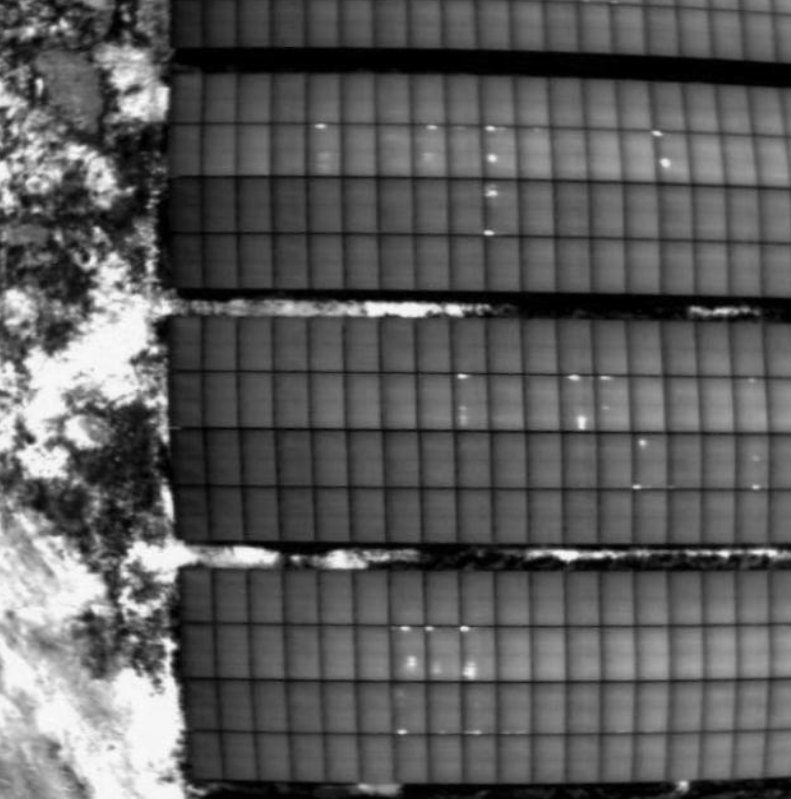

In [ ]:
import cv2
from ultralytics import YOLO

# Load the model
model = YOLO("yolov8m.pt")  # or your trained model

# Load the image
img_path = "/content/Screenshot 2025-07-22 151915.png"
img = cv2.imread(img_path)  # Read the image

# Run prediction
results = model.predict(img, conf=0.4)  # Use 'img' instead of path for better performance

# Draw bounding boxes
for r in results:
    boxes = r.boxes.xyxy.cpu().numpy()
    confs = r.boxes.conf.cpu().numpy()
    for box, conf in zip(boxes, confs):
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Red box (BGR format)
        cv2.putText(
            img,
            f"defect {conf:.2f}",
            (x1, y1 - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.5,
            (0, 255, 0),  # Green text
            2,
        )

# Save or display the result
output_path = "/content/output.png"
cv2.imwrite(output_path, img)  # Save the image
print(f"Result saved to {output_path}")

# To display in Google Colab/Jupyter Notebook:
from IPython.display import Image
Image(filename=output_path)